# Thinplate

In [1]:
from IPython import get_ipython
if get_ipython():
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections
import scipy

import latenta as la
la.logger.setLevel("INFO")

## Grid random walks


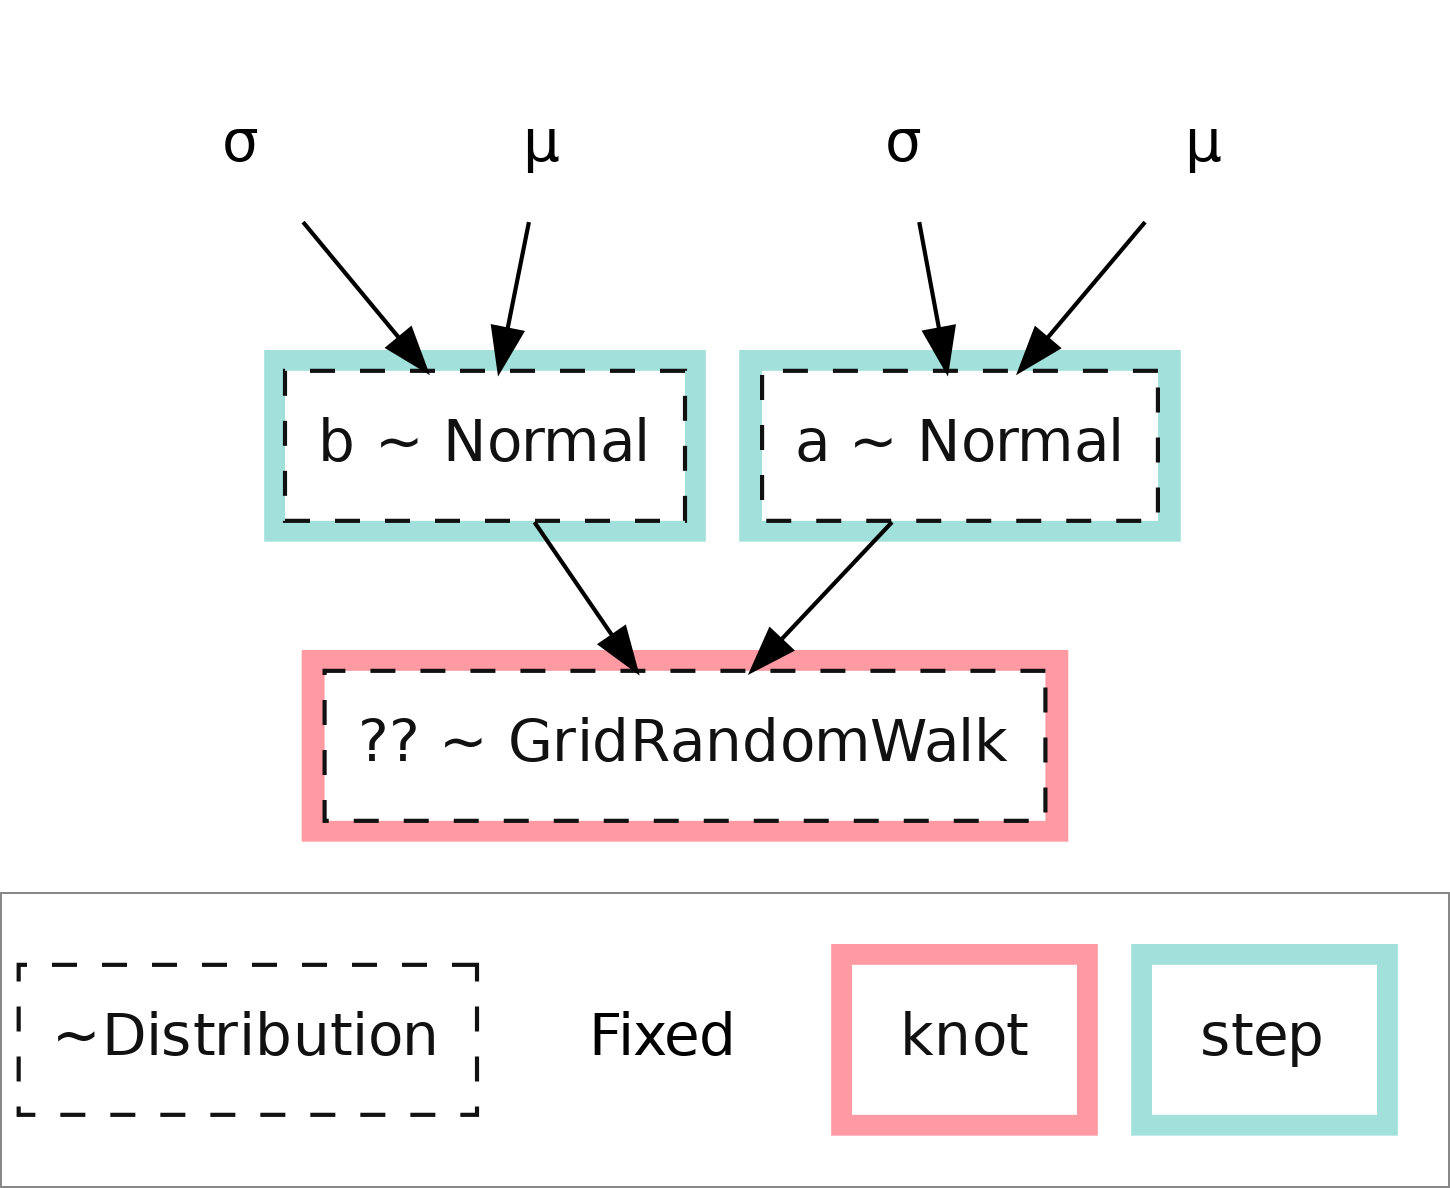

In [2]:
dist = la.distributions.GridRandomWalk(
     {"a":la.distributions.Normal(), "b":la.distributions.Normal()},
    n_knots = [10, 5],
    circular = [False, False])
dist.plot()

tensor([ 0.0000,  0.0176, -0.8471, -1.8587, -0.5871,  1.3107,  0.0239, -1.2533,
        -0.9093, -2.1415,  2.1589,  1.7876,  1.7907, -0.5097, -0.0531,  2.4145,
         3.5466,  3.7607, -0.2418,  0.0566,  1.9470,  1.0377, -0.5646, -1.4780,
        -0.8788,  3.1633,  1.7049, -1.0744, -1.1117, -1.7067,  2.4170,  2.0586,
        -0.1910, -1.6617, -0.8161,  1.5841,  2.0845, -1.1647, -3.8529, -2.2290,
         2.3828, -0.4726, -4.4449, -5.6226, -3.3385,  3.3959,  0.0189, -0.2041,
        -2.1328,  0.0762])
tensor([-78.1098])


<AxesSubplot:>

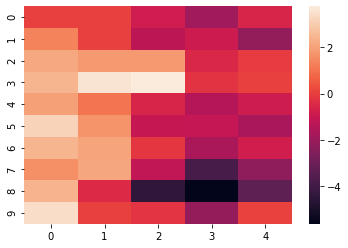

In [5]:
dist.reset()
dist.run()
print(dist.value)
print(dist.likelihood)
sns.heatmap(dist.value.reshape(dist.n_knots).cpu().numpy())

In [6]:
knots = torch.zeros(dist.n_knots)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
print(likelihood/np.log(scipy.stats.norm().pdf(0.)))
assert likelihood/np.log(scipy.stats.norm().pdf(0.)) == 85

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([85.])


In [14]:
knots = torch.arange(dist.n_knots[0]).repeat(dist.n_knots[1], 1).T + \
    torch.arange(dist.n_knots[1]).repeat(dist.n_knots[0], 1)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
print(likelihood/np.log(scipy.stats.norm().pdf(1.)))
assert likelihood/np.log(scipy.stats.norm().pdf(1.)) == 85

tensor([[ 0,  1,  2,  3,  4],
        [ 1,  2,  3,  4,  5],
        [ 2,  3,  4,  5,  6],
        [ 3,  4,  5,  6,  7],
        [ 4,  5,  6,  7,  8],
        [ 5,  6,  7,  8,  9],
        [ 6,  7,  8,  9, 10],
        [ 7,  8,  9, 10, 11],
        [ 8,  9, 10, 11, 12],
        [ 9, 10, 11, 12, 13]])
tensor([85.])


In [15]:
knots = torch.arange(dist.n_knots[0]).repeat(dist.n_knots[1], 1).T * 2 + \
    torch.arange(dist.n_knots[1]).repeat(dist.n_knots[0], 1)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
expected_steps = np.hstack([np.repeat(1., dist.n_knots[0] * (dist.n_knots[1] - 1)), np.repeat(2., dist.n_knots[1] * (dist.n_knots[0] - 1))])
expected_likelihood = np.log(scipy.stats.norm().pdf(expected_steps)).sum()
    
assert np.isclose(likelihood, expected_likelihood)

tensor([[ 0,  1,  2,  3,  4],
        [ 2,  3,  4,  5,  6],
        [ 4,  5,  6,  7,  8],
        [ 6,  7,  8,  9, 10],
        [ 8,  9, 10, 11, 12],
        [10, 11, 12, 13, 14],
        [12, 13, 14, 15, 16],
        [14, 15, 16, 17, 18],
        [16, 17, 18, 19, 20],
        [18, 19, 20, 21, 22]])


----

In [36]:
genes = la.Dim(pd.Series(range(100), name = "gene").astype(str))


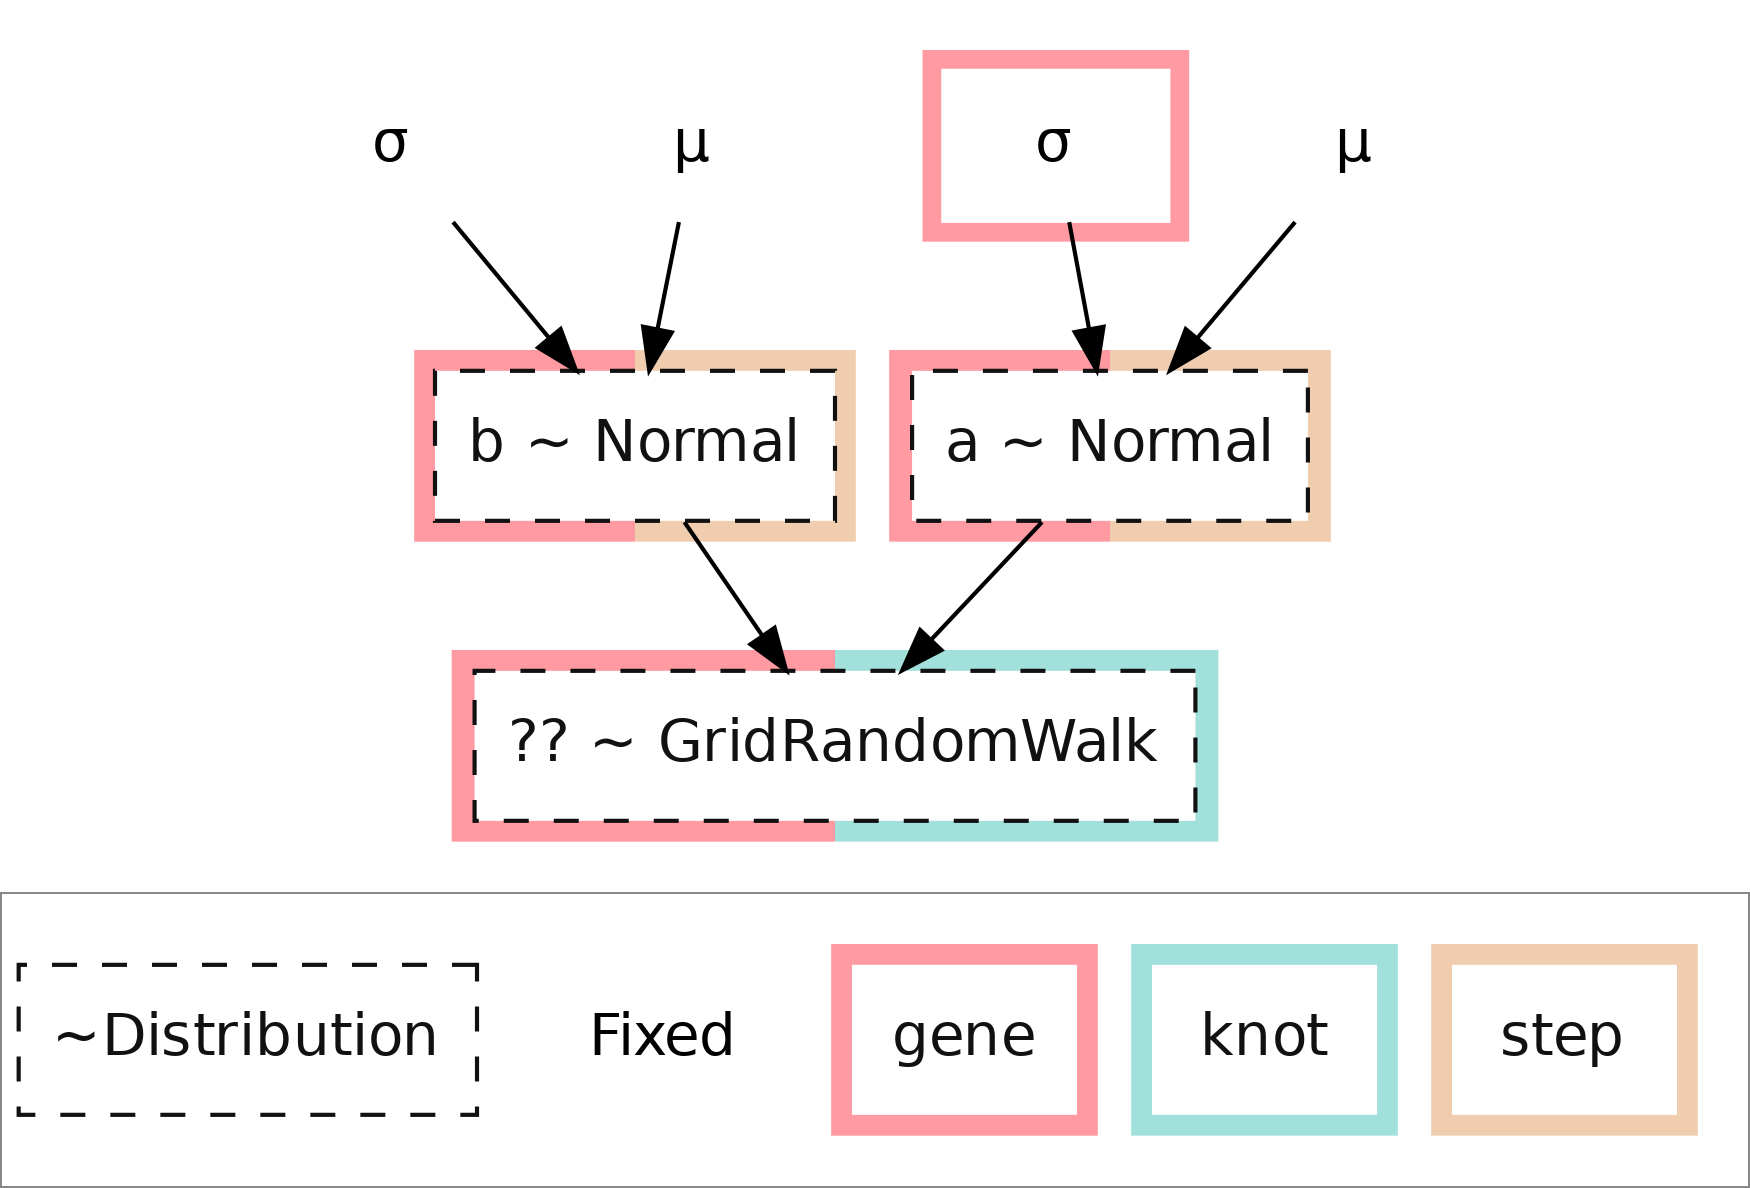

In [37]:
dist = la.distributions.GridRandomWalk(
    {
        "a":la.distributions.Normal(scale = la.Fixed(pd.Series(np.arange(len(genes)) / 10 + 1, index = genes.index).astype(float))),
        "b":la.distributions.Normal()
    },
    n_knots = [10, 5],
    circular = [False, False]
)
dist.plot()

In [38]:
dist.reset()
dist.run()

<AxesSubplot:>

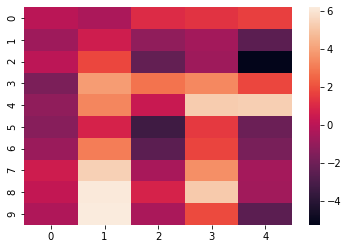

In [39]:
sns.heatmap(dist.value.reshape((len(genes), ) + tuple(dist.n_knots)).cpu().numpy()[0])

<AxesSubplot:>

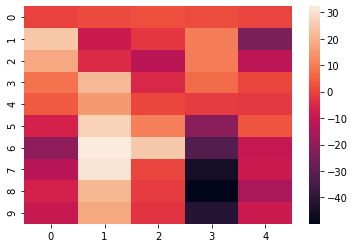

In [40]:
sns.heatmap(dist.value.reshape((len(genes), ) + tuple(dist.n_knots)).cpu().numpy()[-1])

-----


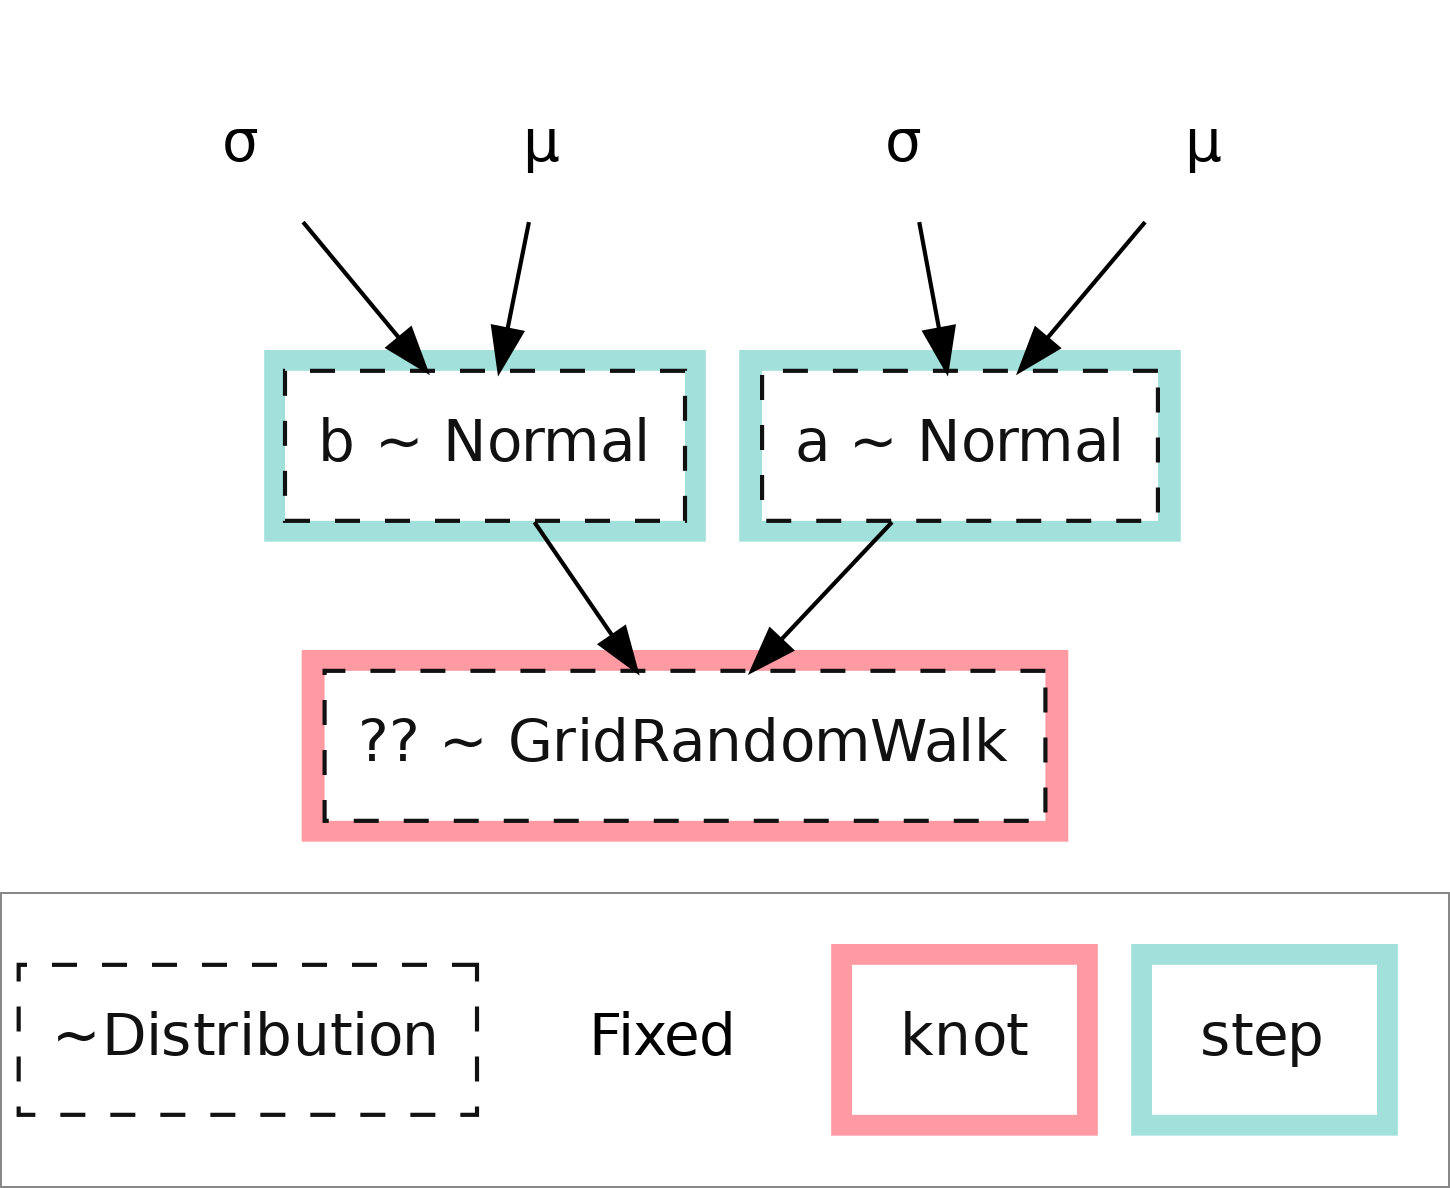

In [41]:
dist = la.distributions.GridRandomWalk(
     {"a":la.distributions.Normal(), "b":la.distributions.Normal()},
    n_knots = [10, 5],
    circular = [False, True])
dist.plot()

tensor([-0.8558, -1.4617, -0.4621, -0.4030, -1.6181, -1.0092,  1.1852,  1.6347,
         4.4306,  3.9806, -2.2206, -2.0058, -2.3719, -0.2300, -0.0657, -3.1321,
         1.4504,  0.4303,  0.7654, -2.9573, -0.6529,  2.7532,  2.0665,  5.3024,
        -1.2054, -3.7879,  0.2443, -1.3656,  4.6753, -2.0113, -0.8725,  1.5349,
         2.5219,  7.7409,  1.4803,  0.0287,  0.3980,  1.0049,  4.4107,  0.1957,
        -1.6993,  0.9552,  1.6925,  4.2639,  1.8574, -0.4827, -0.0606,  0.4252,
         2.1798, -2.2924])
tensor([-459.5915])


<AxesSubplot:>

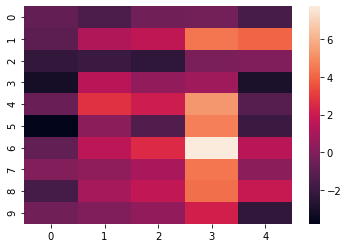

In [42]:
dist.reset()
dist.run()
print(dist.value)
print(dist.likelihood)
sns.heatmap(dist.value.reshape(dist.n_knots).cpu().numpy())

In [43]:
knots = torch.zeros(dist.n_knots)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
print(likelihood/np.log(scipy.stats.norm().pdf(0.)))
assert np.isclose(likelihood/np.log(scipy.stats.norm().pdf(0.)), 95)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([95.0000])


In [44]:
knots = torch.arange(dist.n_knots[0]).repeat(dist.n_knots[1], 1).T * 2 + \
    torch.arange(dist.n_knots[1]).repeat(dist.n_knots[0], 1)
print(knots)
likelihood = dist.log_prob(knots.reshape((np.prod(dist.n_knots))))
expected_steps = np.hstack([np.repeat(1., dist.n_knots[0] * (dist.n_knots[1] - 1)), np.repeat(4., dist.n_knots[0]), np.repeat(2., dist.n_knots[1] * (dist.n_knots[0] - 1))])
expected_likelihood = np.log(scipy.stats.norm().pdf(expected_steps)).sum()
    
assert np.isclose(likelihood, expected_likelihood)

tensor([[ 0,  1,  2,  3,  4],
        [ 2,  3,  4,  5,  6],
        [ 4,  5,  6,  7,  8],
        [ 6,  7,  8,  9, 10],
        [ 8,  9, 10, 11, 12],
        [10, 11, 12, 13, 14],
        [12, 13, 14, 15, 16],
        [14, 15, 16, 17, 18],
        [16, 17, 18, 19, 20],
        [18, 19, 20, 21, 22]])


## Thinplate (circular + normal)

In [56]:
n_cells = 2000
cell_ids = [str(i) for i in range(n_cells)]
cell_index = pd.Series(cell_ids, name = "cell")

In [59]:
x_value = pd.Series(np.linspace(0., 4., n_cells), index = cell_index)
x = la.Fixed(x_value, distribution = la.distributions.Uniform(0., 4.), label = "x", symbol = r"x")
x

x:  ↦ Fixed [cell (2000)]

In [60]:
weights = np.vstack([
    np.ones(n_cells),
    x_value**(2)
]).T
weights = weights / weights.sum(1)[:, None]
angle_samples = np.vstack([
    np.random.uniform(0, 2 * np.pi, n_cells),
    np.random.normal(0., 0.5, n_cells) % (2*np.pi)
]).T
angle_value = angle_samples[np.arange(weights.shape[0]), (np.random.rand(weights.shape[0]) > weights[:, 0]).astype(np.int32)]

angle_value = pd.Series(angle_value, index = cell_index)
angle = la.Fixed(angle_value, distribution = la.distributions.CircularUniform(), label = "angle", symbol = r"\theta")
angle

angle:  ↦ Fixed [cell (2000)]

/home/wsaelens/projects/probabilistic-cell/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

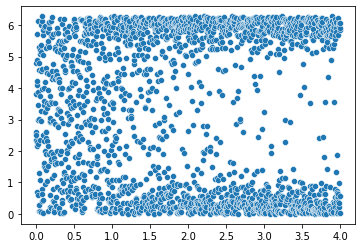

In [61]:
sns.scatterplot(x_value, angle_value)

### Toy data

In [62]:
observation_value_exact = pd.DataFrame(
    np.vstack([
        np.zeros(n_cells),
        np.sin(angle_value),
        x_value,
        np.sin(angle_value) + x_value,
        np.sin(angle_value) * x_value,
        np.sin(angle_value) * x_value - x_value,
        ((angle_value > 0) & (angle_value < 3) & (x_value < 2.)).astype(float)
    ]).T,
    index = cell_index,
    columns = ["nothing", "angle", "x", "angle + x", "angle * x", "angle * x - x", "complex"]
)
observation_value = observation_value_exact + np.random.normal(0., 1., observation_value_exact.shape)
# observation_value.columns = [str(i) for i in range(observation_value.shape[1])]
observation_value.columns.name = "feature"

features = la.Dim(observation_value.columns)

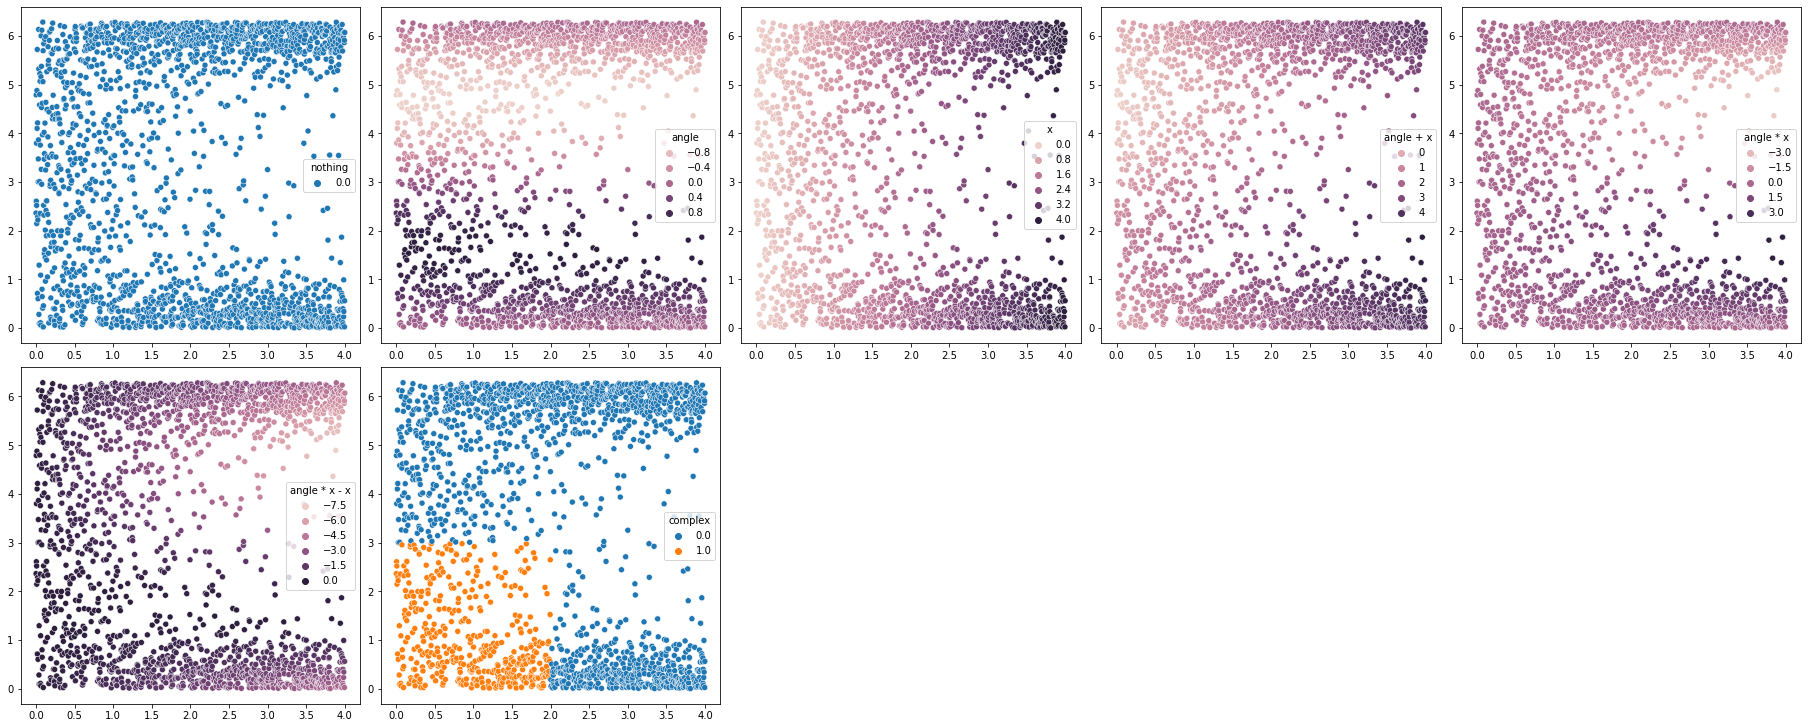

In [63]:
fig, axes = la.plotting.axes_wrap(observation_value_exact.shape[1])
for gene_id, ax in zip(observation_value_exact.columns, axes):
    sns.scatterplot(x = x_value, y = angle_value, hue = observation_value_exact[gene_id], ax = ax)

### Modelling

In [64]:
output_definition = la.Definition.from_xr(observation_value)
output_definition
output_distribution = la.distributions.Laplace()

In [65]:
models = {}

In [66]:
z = la.modular.Additive(intercept = la.Latent(la.distributions.Normal(), definition = la.Definition([features])), definition = output_definition.clone(), label = "z")
z.x_angle_effect = la.links.scalars.Thinplate(
    {"x":x, "angle":angle},
    output = output_definition,
    n_knots = 10,
    output_distribution = output_distribution,
    label = "x,angle",
    symbol = r"\{x,angle\}_effect"
)
z.empirical = xr.DataArray(observation_value)
s = la.Parameter(1.)
dist2 = la.distributions.Normal(loc = z, scale = s)
observation = la.Observation(observation_value, dist2, label = "observation")

models["thinplate"] = la.Model(observation)


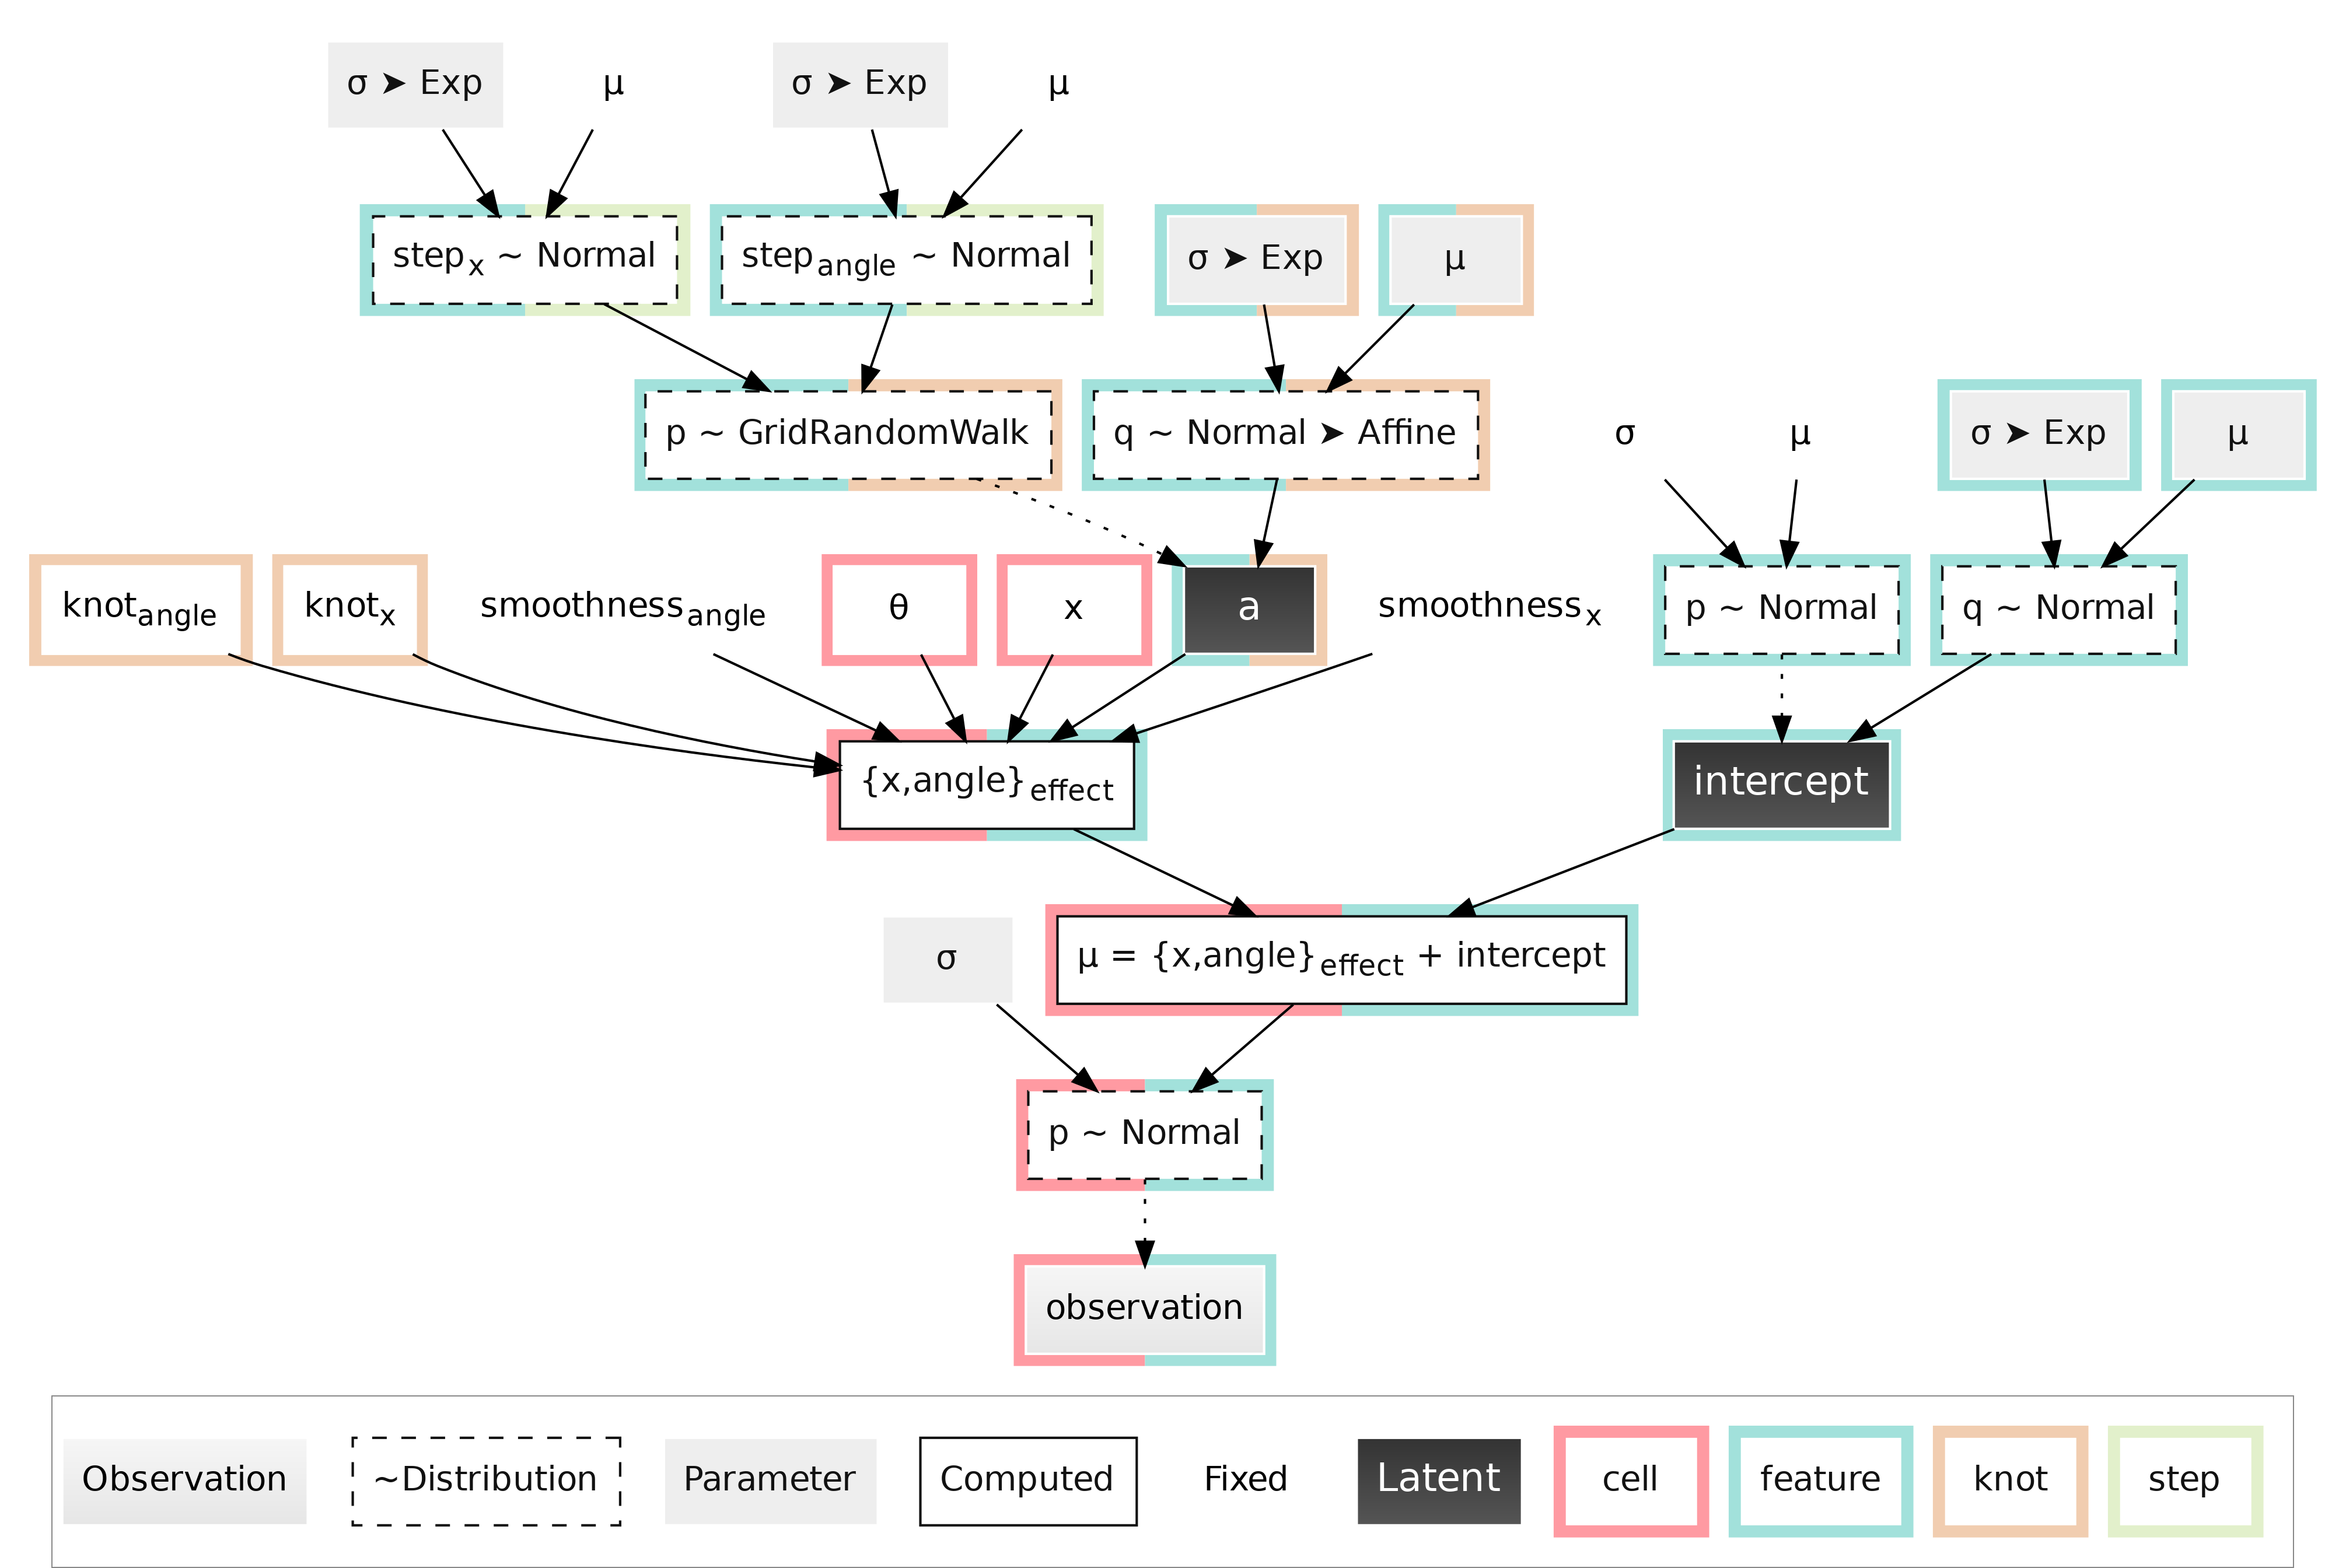

In [67]:
observation.plot()

In [70]:
z = models["thinplate"].find("z").clone()

x = z.find("x")
angle = z.find("angle")

z.x_effect = la.links.scalar.Spline(
    x,
    output = output_definition,
    n_knots = 10,
    step_distribution = la.distributions.Normal(z.x_angle_effect.a.p.step_x.loc, z.x_angle_effect.a.p.step_x.scale),
    output_distribution = output_distribution
)
z.angle_effect = la.links.scalar.CircularSpline(
    angle,
    output = output_definition,
    n_knots = 10,
    step_distribution = la.distributions.Normal(z.x_angle_effect.a.p.step_angle.loc, z.x_angle_effect.a.p.step_angle.scale),
    output_distribution = output_distribution
)
z.empirical = xr.DataArray(observation_value)
s = la.Parameter(1.)
dist2 = la.distributions.Normal(loc = z, scale = s)
observation = la.Observation(observation_value, dist2, label = "observation")

models["spline_thinplate"] = la.Model(observation)

tensor(2.2500)
tensor(1.4324)



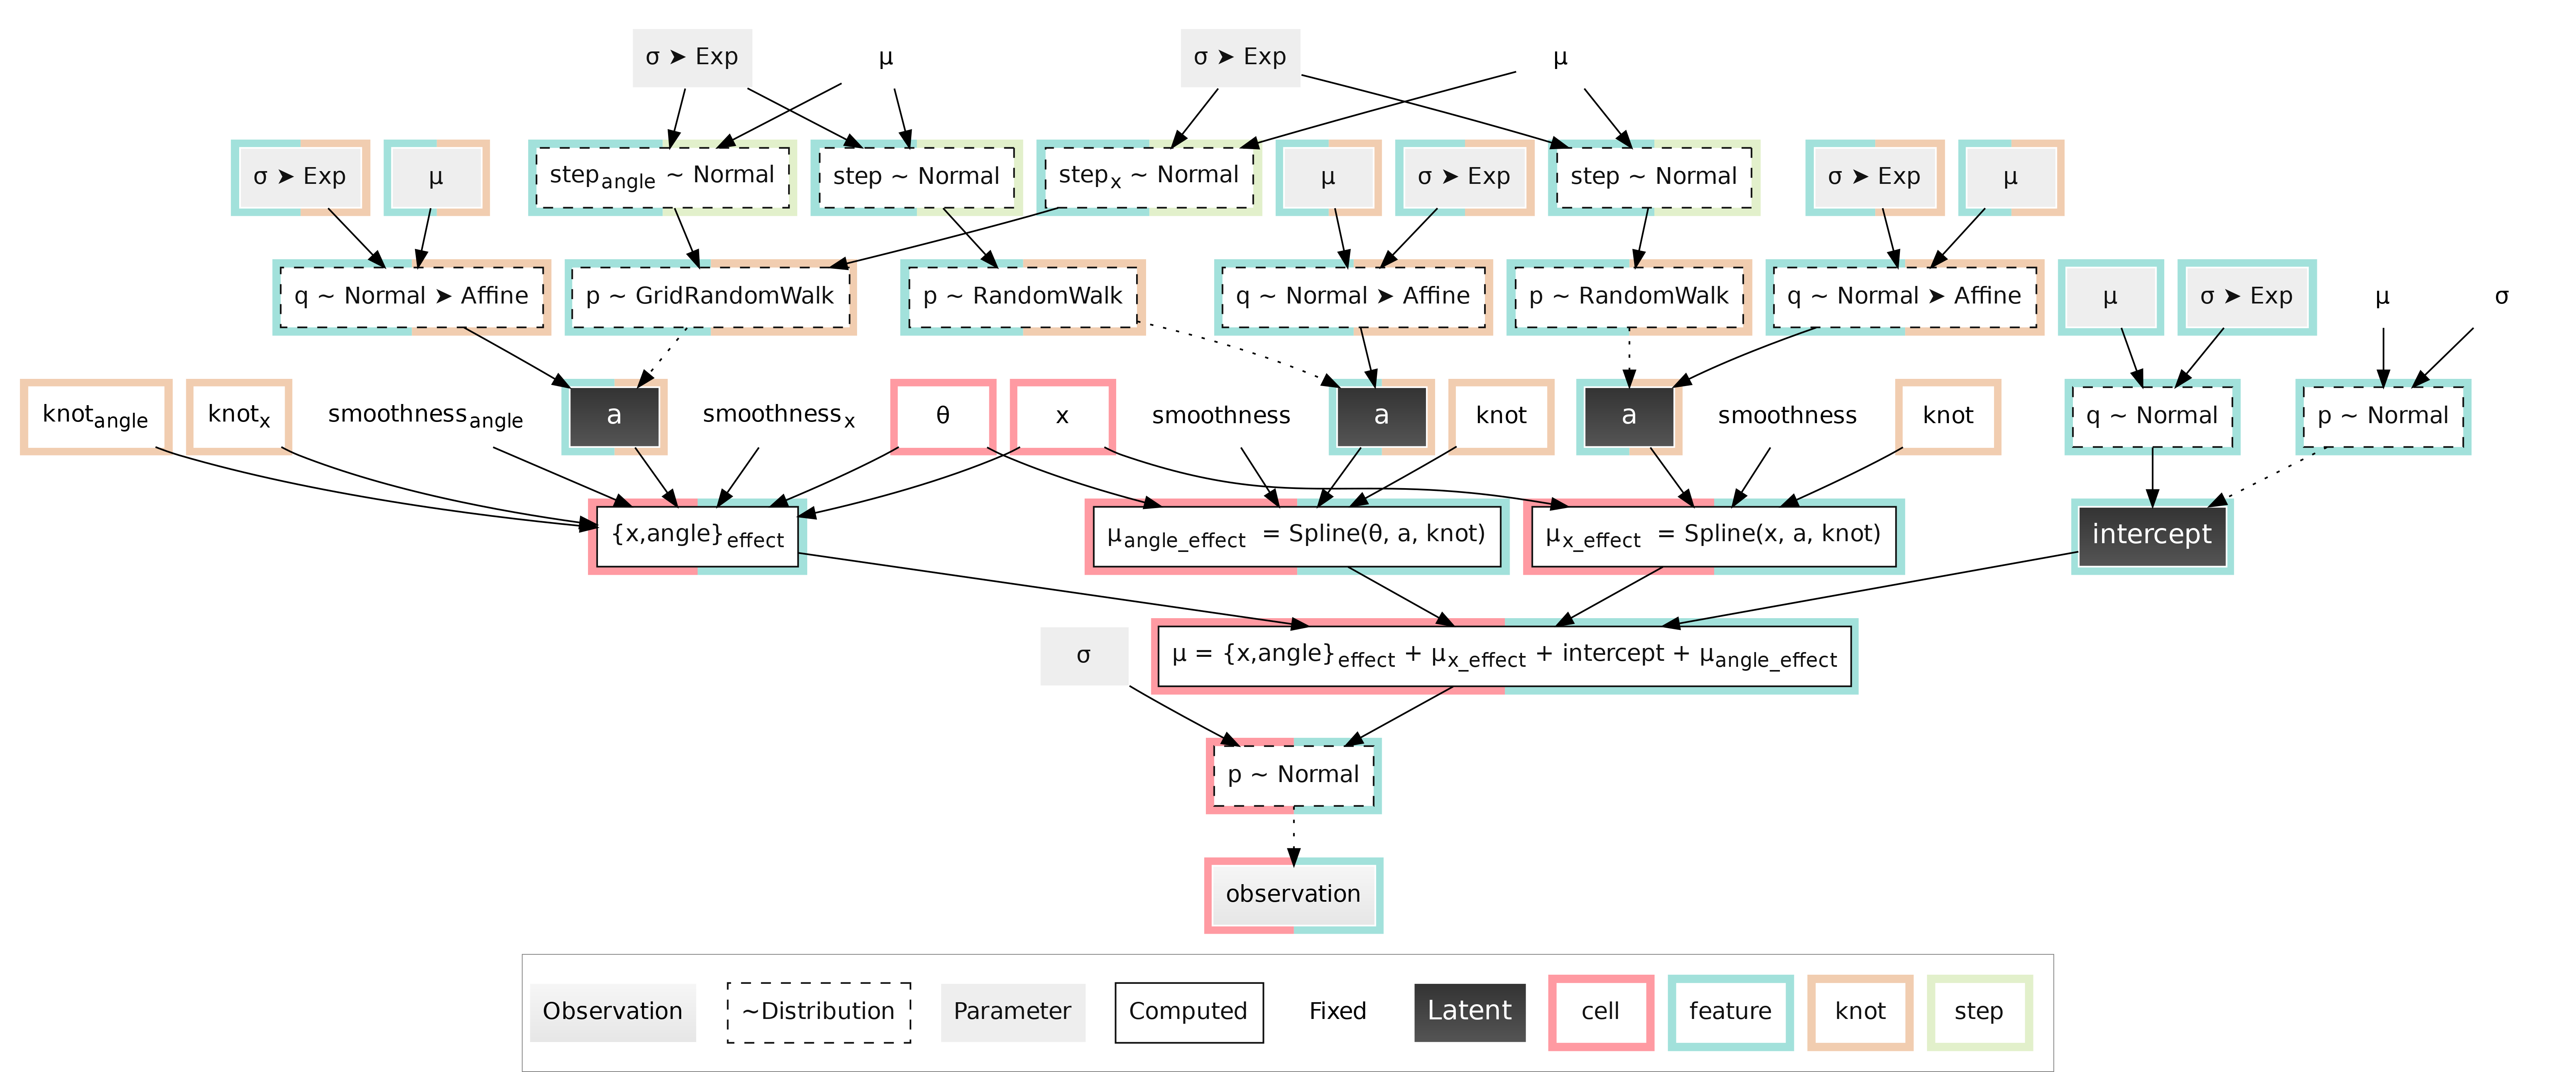

In [71]:
observation.plot()

In [72]:
# retrain = False
retrain = True
for model_id, model in models.items():
    print(model_id)
    if ("observed" not in model) or retrain:
        inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.01), subsamplers = {"cell":la.infer.subsampling.Subsampler(150)})
        trainer = la.infer.trainer.Trainer(inference)
        trace = trainer.train(10000)
        
        inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.01), subsamplers = {"cell":la.infer.subsampling.Subsampler(150)})
        trainer = la.infer.trainer.Trainer(inference)
        trace = trainer.train(10000)
        
        inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.01), subsamplers = {"cell":la.infer.subsampling.Subsampler(150)})
        trainer = la.infer.trainer.Trainer(inference)
        trace = trainer.train(10000)

thinplate


  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

spline_thinplate


  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

In [73]:
# retrain = True
for model_id, model in models.items():
    print(model_id)
    if ("observed" not in model) or retrain:
        model["observed"] = la.posterior.Observed(model.observation)
        model["observed"].sample(10)
        
        for id in ["causal_x", "causal_angle", "causal_x_angle"]:
            if id in model:
                del model[id]

thinplate


  0%|          | 0/10 [00:00<?, ?it/s]

spline_thinplate


  0%|          | 0/10 [00:00<?, ?it/s]

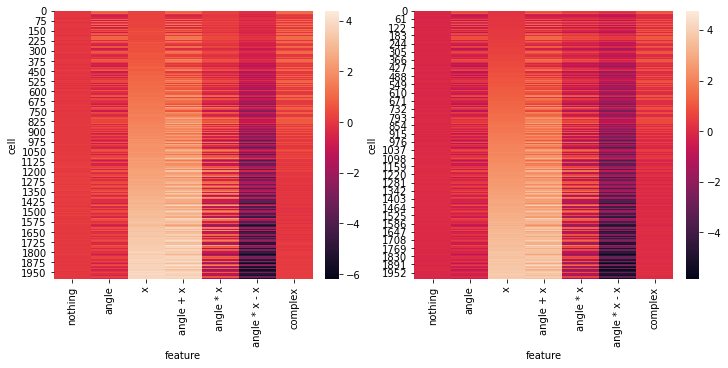

In [74]:
fig, axes = la.plotting.axes_wrap(len(models))
for ax, (model_id, model) in zip(axes, models.items()):
    sns.heatmap(model["observed"].samples[z].mean("sample").to_pandas(), ax = ax)

In [76]:
for model_id, model in models.items():
    print(model_id)
#     del model["causal"]
    x = model.find("x")
    if "causal_x" not in model:
        causal_x = la.posterior.scalar.ScalarVectorCausal(x, model.observation, observed = model["observed"])
        causal_x.sample(20)
        causal_x.sample_bootstrap(2)

        model["causal_x"] = causal_x
        
    angle = model.find("angle")
    if "causal_angle" not in model:
        causal_angle = la.posterior.scalar.ScalarVectorCausal(angle, model.observation, observed = model["observed"])
        causal_angle.sample(20)
        causal_angle.sample_bootstrap(2)

        model["causal_angle"] = causal_angle
        
    if "causal_x_angle" not in model:
        causal_x_angle = la.posterior.scalarscalar.ScalarScalarVectorCausal(model["causal_x"], model["causal_angle"])
        causal_x_angle.sample(100)

        model["causal_x_angle"] = causal_x_angle

thinplate


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

spline_thinplate


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_274833/1754914083.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
/tmp/ipykernel_274833/1754914083.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


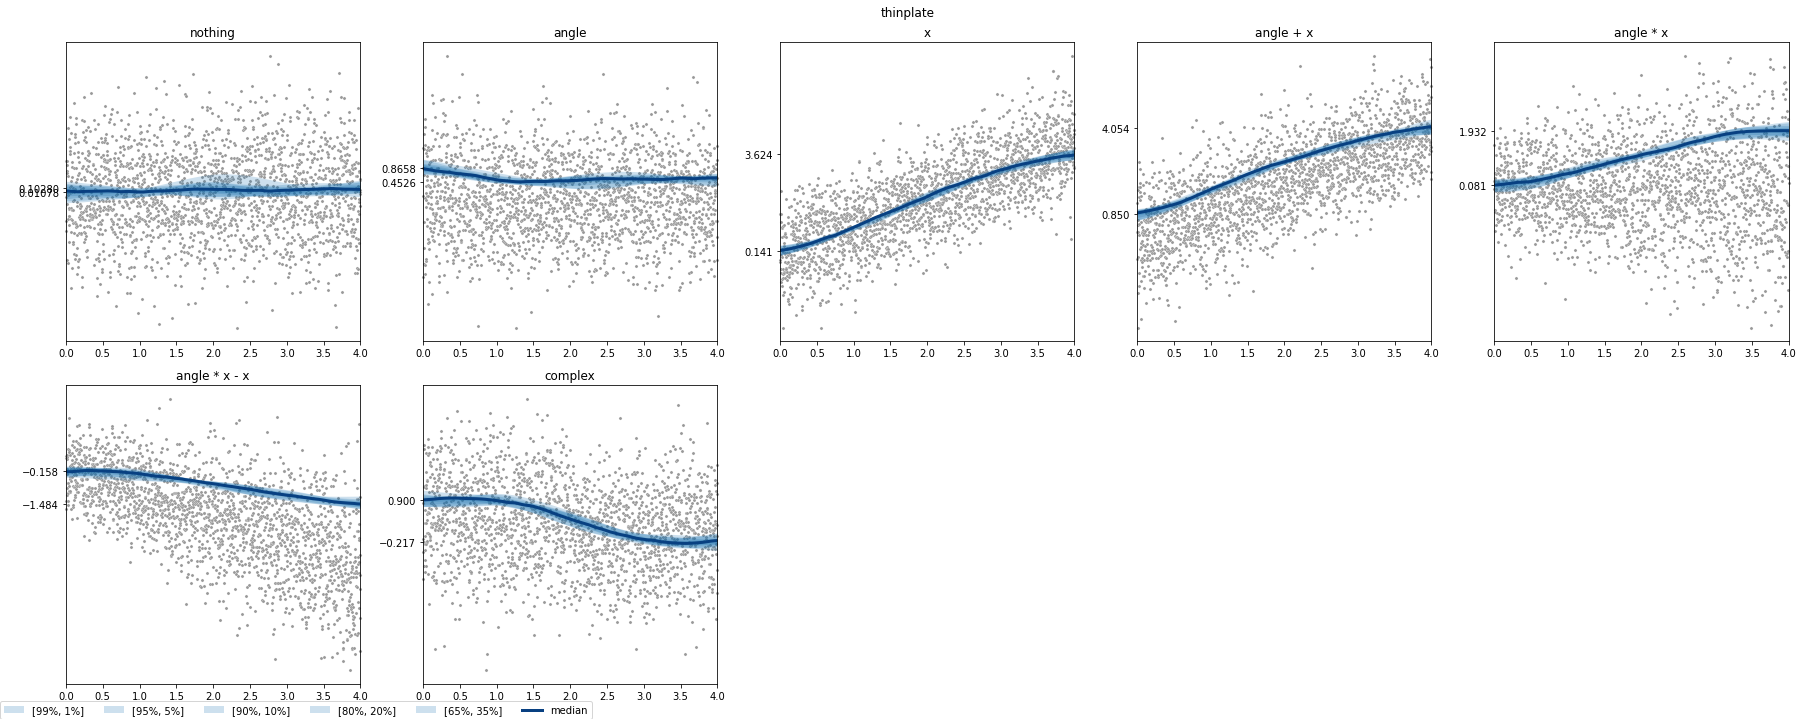

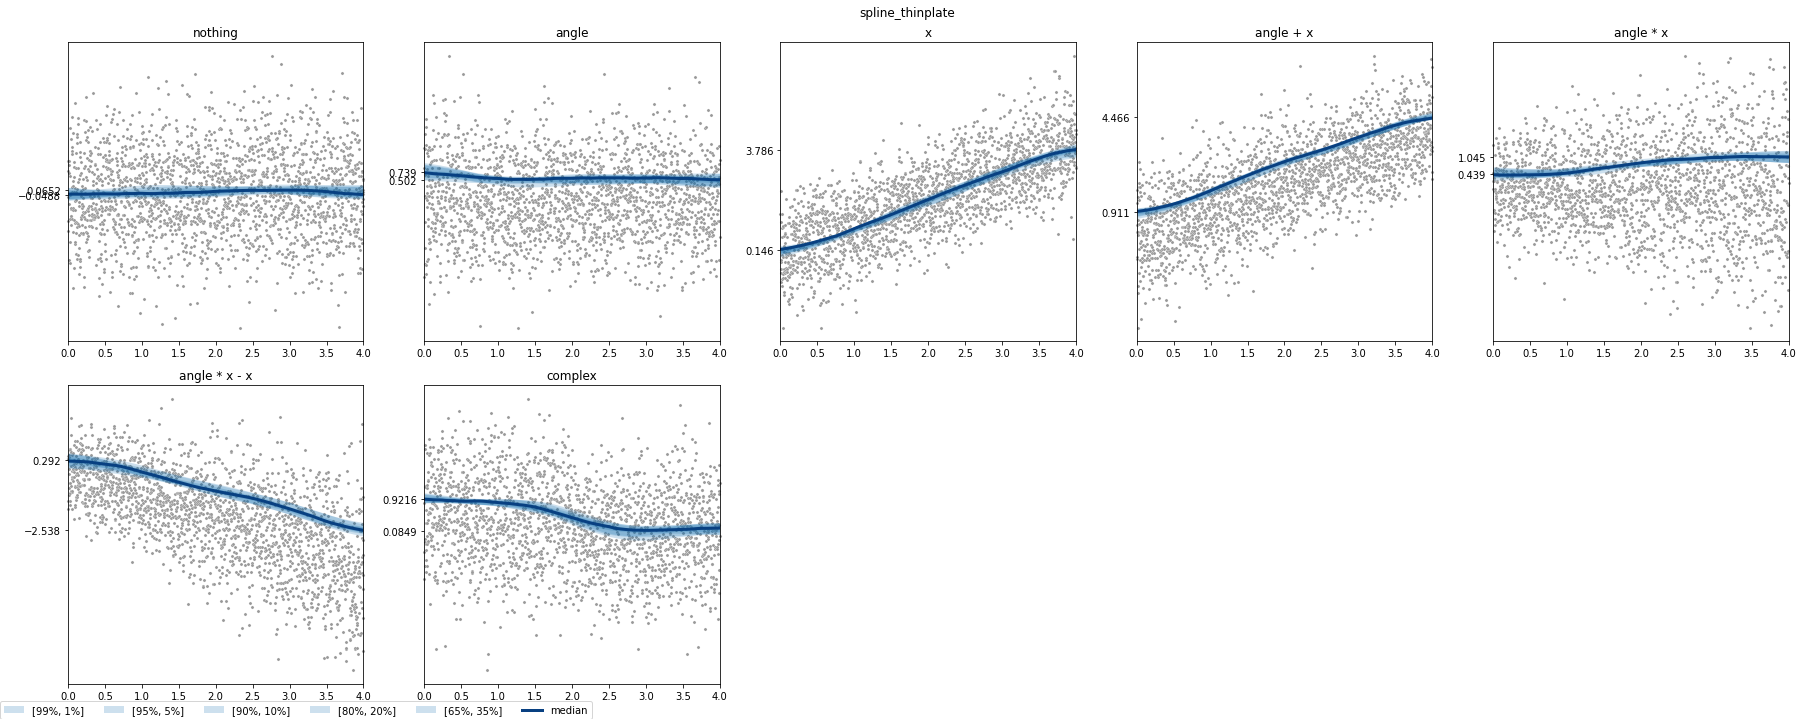

In [77]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig = model["causal_x"].plot_features(feature_ids = feature_ids);
    fig.suptitle(model_id)
    fig.tight_layout()

/tmp/ipykernel_274833/2628398980.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
/tmp/ipykernel_274833/2628398980.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


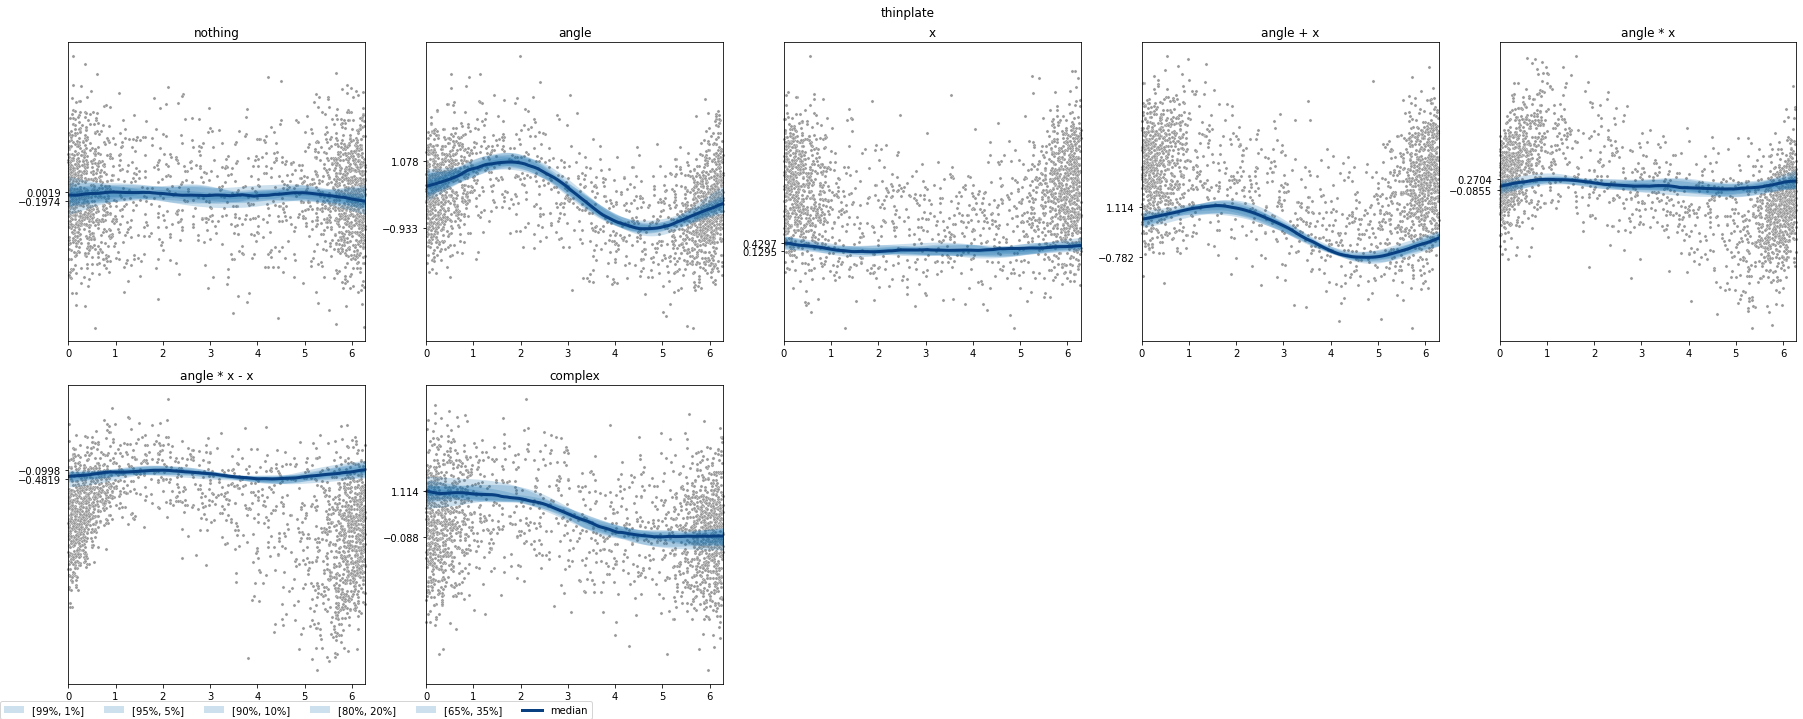

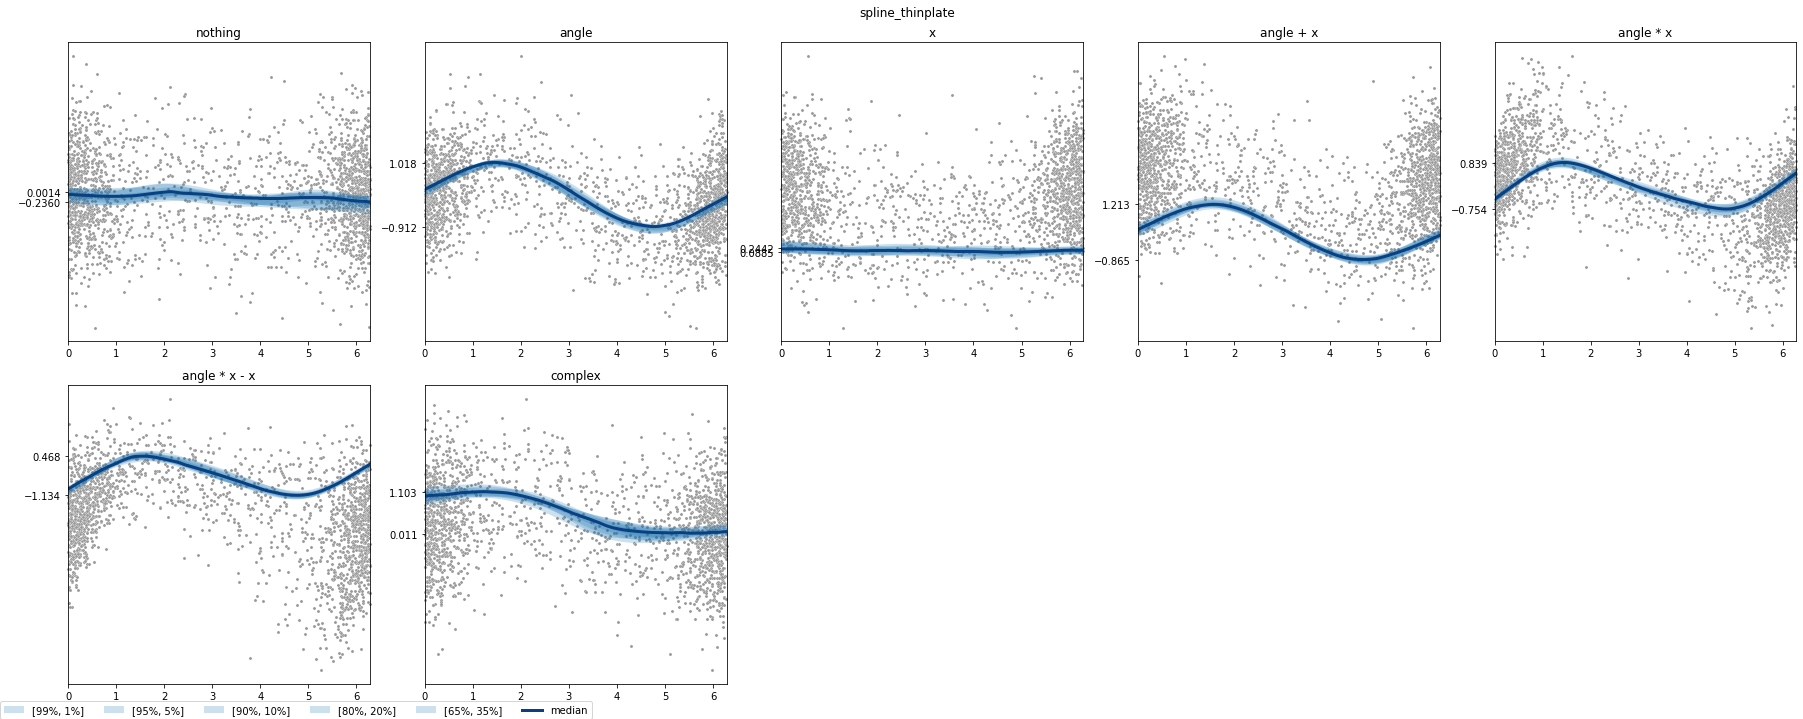

In [78]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig = model["causal_angle"].plot_features(feature_ids = feature_ids);
    fig.suptitle(model_id)
    fig.tight_layout()

/tmp/ipykernel_274833/521722564.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
/tmp/ipykernel_274833/521722564.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


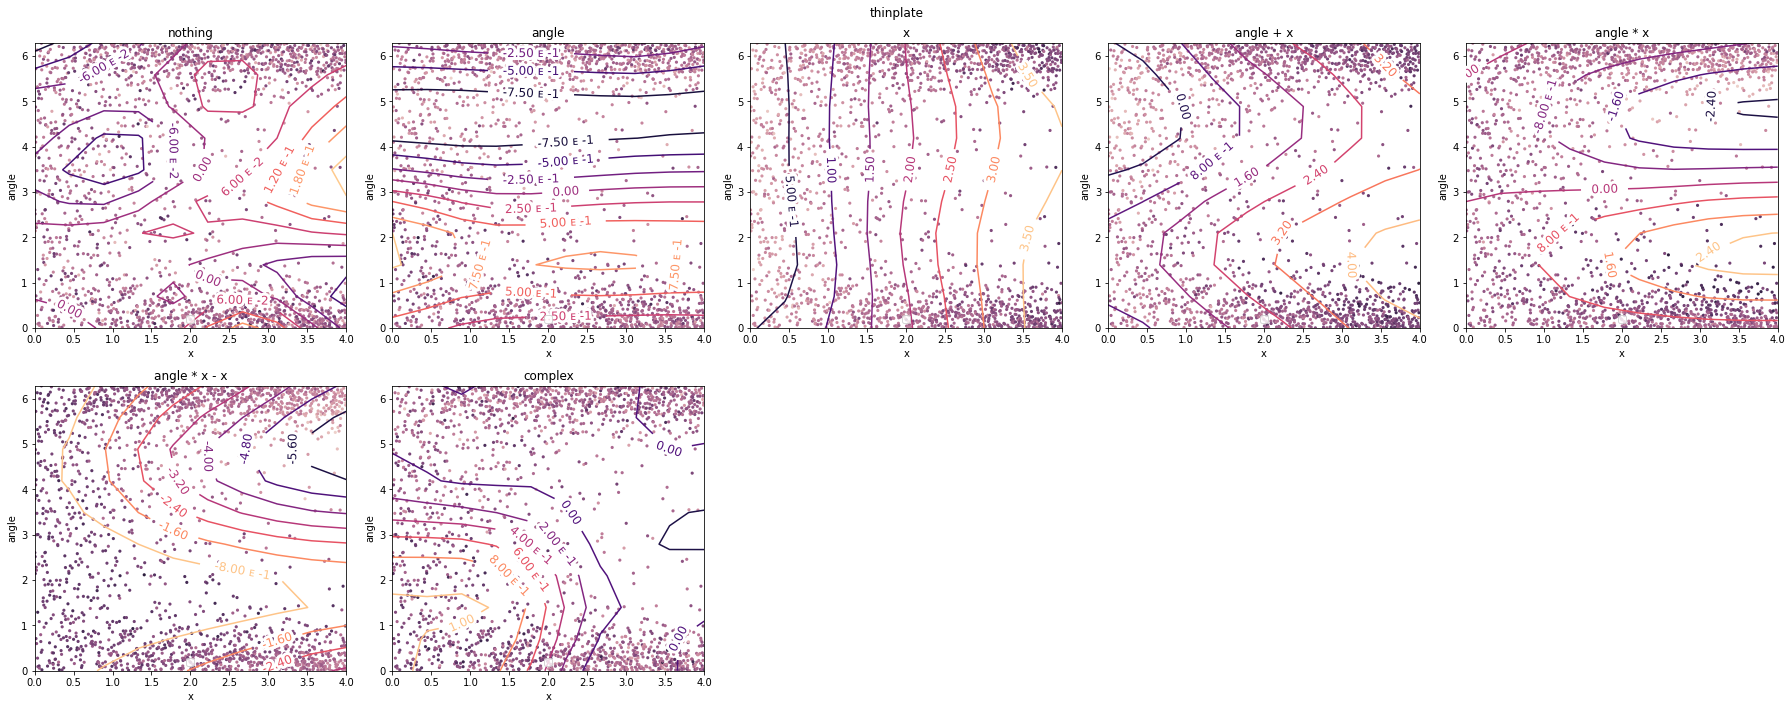

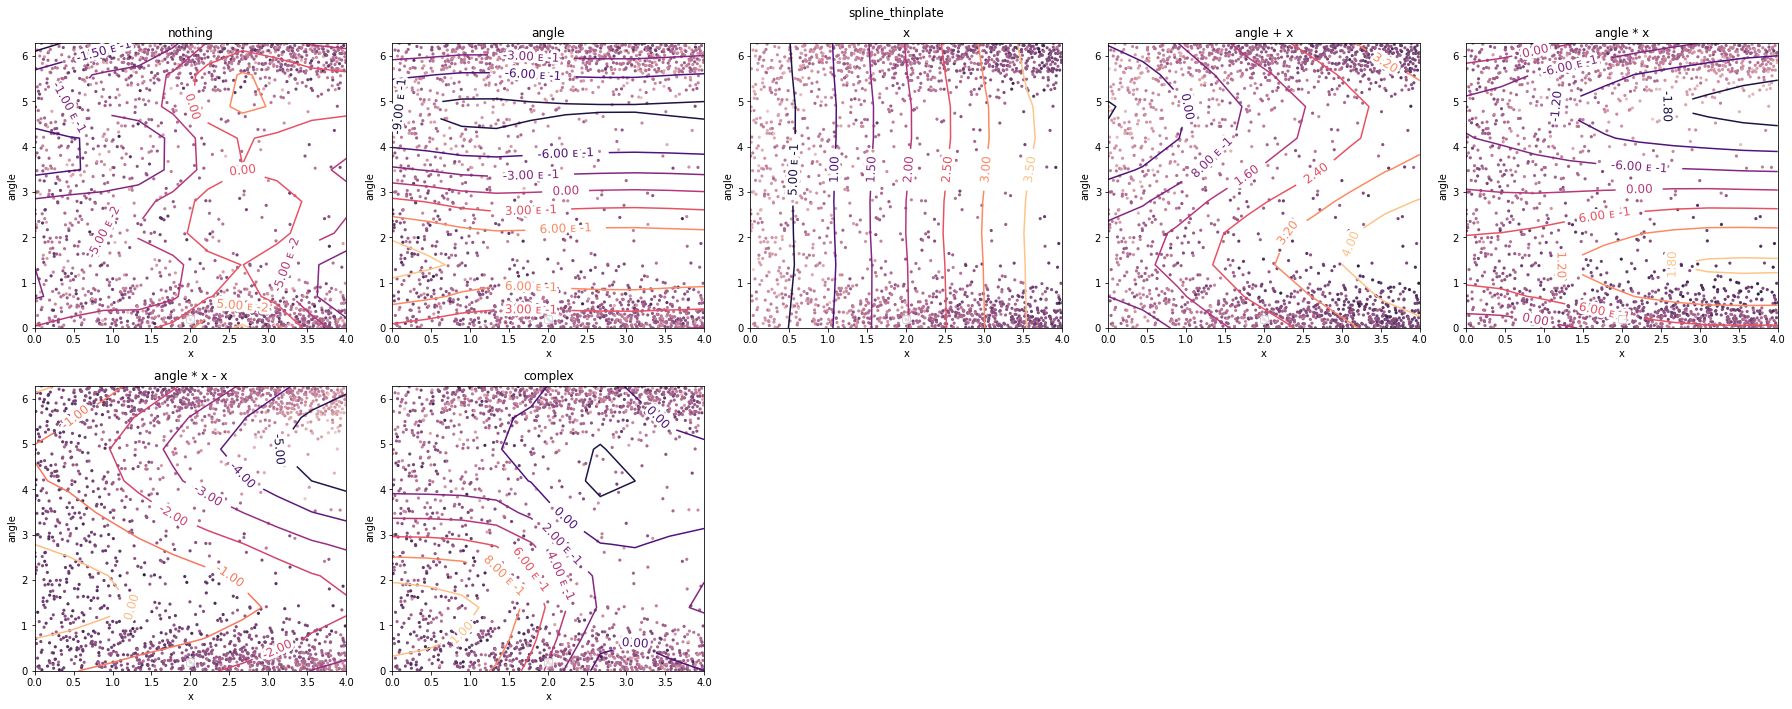

In [79]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig = model["causal_x_angle"].plot_features_contour(feature_ids = feature_ids);
    fig.suptitle(model_id)
    fig.tight_layout()

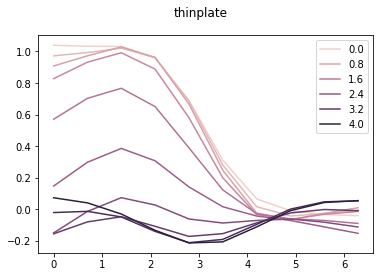

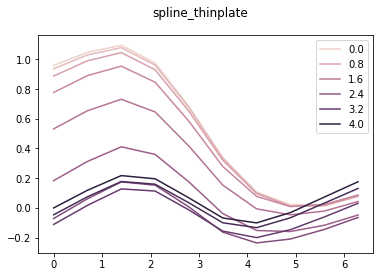

In [82]:
feature_ids = observation_value.columns
for model_id, model in models.items():
    fig, ax = plt.subplots()
    feature = "complex"
    x_sample = model["causal_x_angle"].samples[model.observation.find("x")].mean("sample")
    angle_sample = model["causal_x_angle"].samples[model.observation.find("angle")].mean("sample")
    z_sample = model["causal_x_angle"].samples[model.observation.p.loc].mean("sample").sel(feature = feature)
    
    sns.lineplot(x = angle_sample.values, y = z_sample.values, hue = x_sample.values, ax = ax)
    fig.suptitle(model_id)

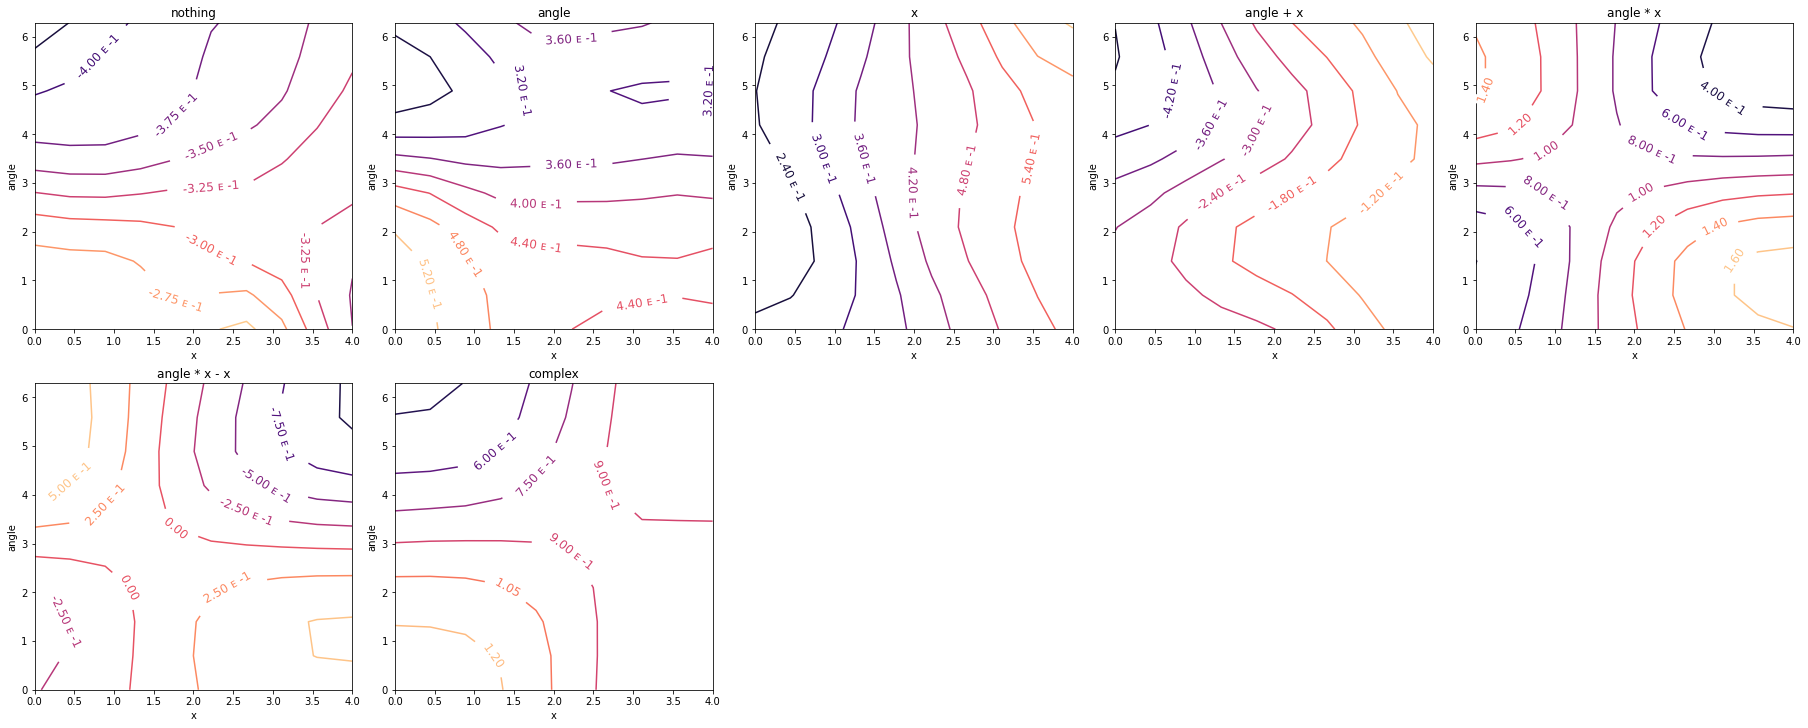

In [83]:
fig = model["causal_x_angle"].plot_features_contour(model.observation.p.loc.x_angle_effect, feature_ids = feature_ids);

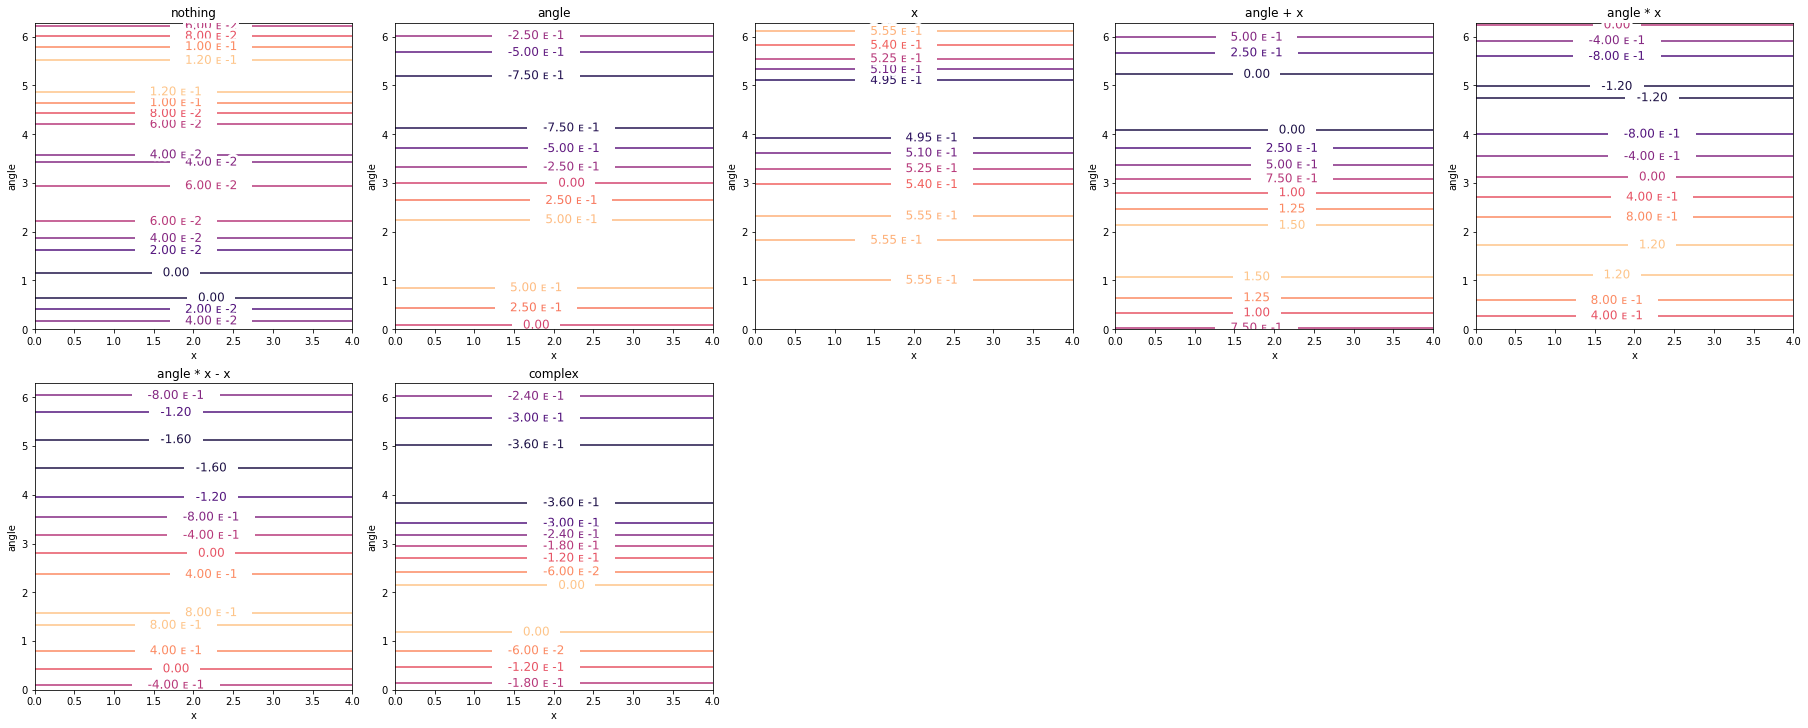

In [84]:
fig = model["causal_x_angle"].plot_features_contour(model.observation.p.loc.angle_effect, feature_ids = feature_ids);

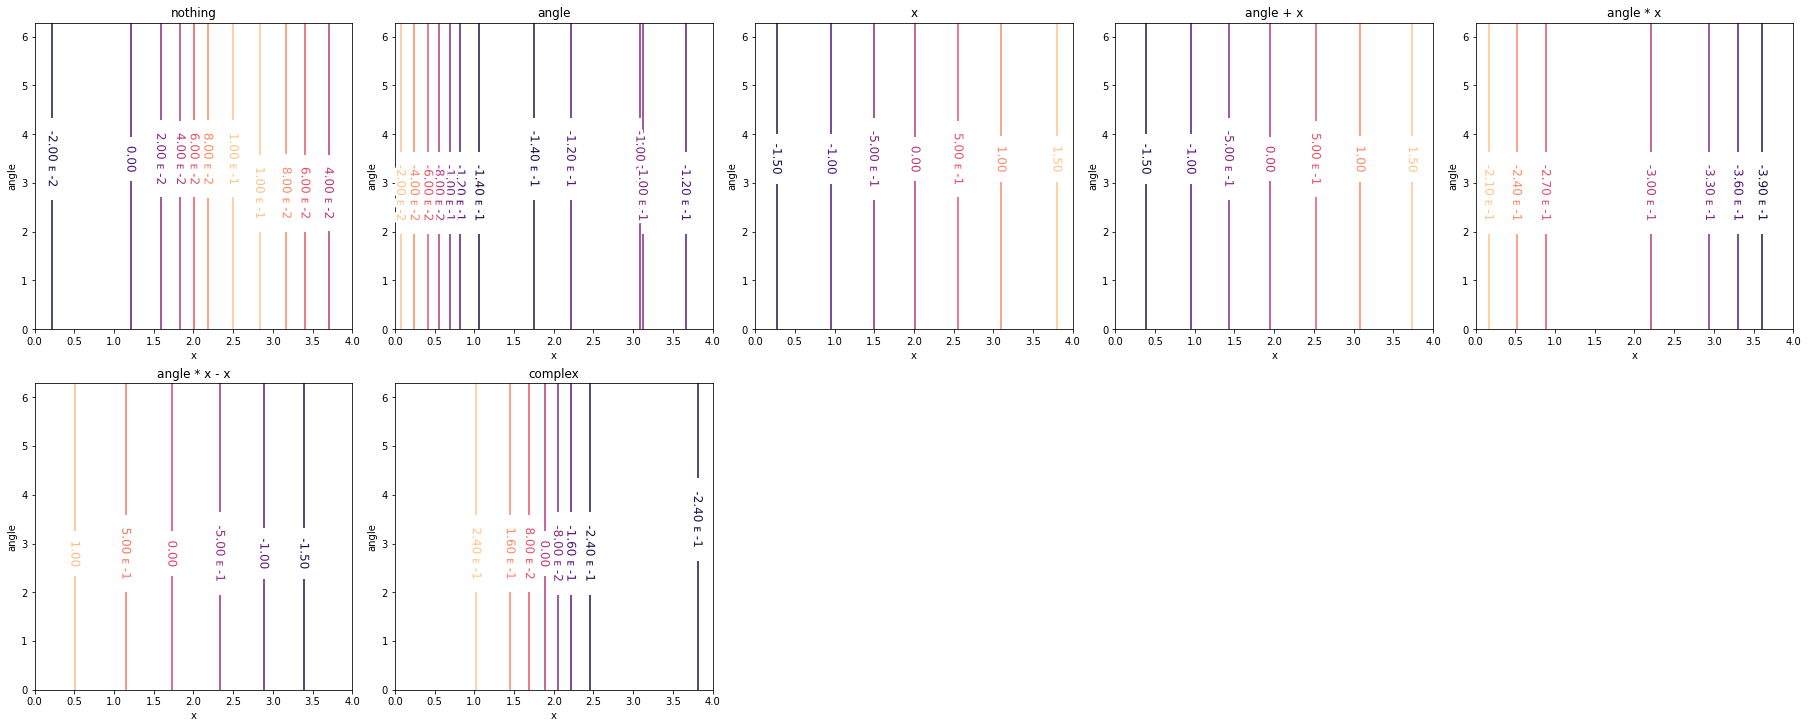

In [85]:
fig = model["causal_x_angle"].plot_features_contour(model.observation.p.loc.x_effect, feature_ids = feature_ids);